In [175]:
import pandas as pd
import numpy as np

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

In [177]:
kbo_p = pd.read_csv('./kbo_투수.csv', encoding = 'cp949')
kbo_b = pd.read_csv('./kbo_타자.csv', encoding = 'cp949')
kbo_d = pd.read_csv('./kbo_수비.csv', encoding = 'cp949')

In [178]:
kbo_p.rename(columns = {'WPA' : '투수WPA'}, inplace = True)
kbo_p.rename(columns = {'WAR' : '투수WAR'}, inplace = True)
kbo_b.rename(columns = {'WPA*' : '타자WPA'}, inplace = True)
kbo_b.rename(columns = {'WAR*' : '타자WAR'}, inplace = True)
kbo_d.rename(columns = {'팀' : '연도'}, inplace = True)
kbo_d.rename(columns = {'이름' : '팀'}, inplace = True)
kbo_d.replace('kt','KT', inplace=True)
kbo_d.replace('SK','SSG', inplace=True)
kbo_d.replace('넥센','키움', inplace=True)

In [179]:
kbo_d = kbo_d[['팀', '연도', '수비율', 'RF9', 'CS', 'BLK', 'WAAwithADJ']]

In [180]:
kbo = ['LG', "두산", "키움", "SSG", "한화", "롯데", "삼성", "KT", "KIA", "NC"]


In [181]:
from collections import defaultdict
kbo_dict_b = defaultdict()
kbo_dict_p = defaultdict()
kbo_dict_d = defaultdict()

In [182]:
for i in range(len(kbo)):
    kbo_dict_b[kbo[i]] = kbo_b[kbo_b["팀"] == kbo[i]].sort_values(by = "연도")
    kbo_dict_p[kbo[i]] = kbo_p[kbo_p["팀"] == kbo[i]].sort_values(by = "연도")
    kbo_dict_d[kbo[i]] = kbo_d[kbo_d["팀"] == kbo[i]].sort_values(by = "연도")
    

In [183]:
#WAR*, WPA* 타자/ WAR, WPA 투수
LG_p = kbo_dict_p['LG']
DS_p = kbo_dict_p['두산']
KW_p = kbo_dict_p['키움']
SSG_p = kbo_dict_p['SSG']
HH_p = kbo_dict_p['한화']
LT_p = kbo_dict_p['롯데']
SS_p = kbo_dict_p['삼성']
KT_p = kbo_dict_p['KT']
KIA_p = kbo_dict_p['KIA']
NC_p = kbo_dict_p['NC']

LG_b = kbo_dict_b['LG']
DS_b = kbo_dict_b['두산']
KW_b = kbo_dict_b['키움']
SSG_b = kbo_dict_b['SSG']
HH_b = kbo_dict_b['한화']
LT_b = kbo_dict_b['롯데']
SS_b = kbo_dict_b['삼성']
KT_b = kbo_dict_b['KT']
KIA_b = kbo_dict_b['KIA']
NC_b = kbo_dict_b['NC']

LG_d = kbo_dict_d['LG']
DS_d = kbo_dict_d['두산']
KW_d = kbo_dict_d['키움']
SSG_d = kbo_dict_d['SSG']
HH_d = kbo_dict_d['한화']
LT_d = kbo_dict_d['롯데']
SS_d = kbo_dict_d['삼성']
KT_d = kbo_dict_d['KT']
KIA_d = kbo_dict_d['KIA']
NC_d = kbo_dict_d['NC']

In [184]:
LG = pd.merge(LG_b,LG_p)
DS = pd.merge(DS_b,DS_p)
KW = pd.merge(KW_b,KW_p)
SSG = pd.merge(SSG_b,SSG_p)
HH = pd.merge(HH_b,HH_p)
LT = pd.merge(LT_b,LT_p)
SS = pd.merge(SS_b,SS_p)
KT = pd.merge(KT_b,KT_p)
KIA = pd.merge(KIA_b,KIA_p)
NC = pd.merge(NC_b,NC_p)

In [185]:
LG = pd.merge(LG,LG_d)
DS = pd.merge(DS,DS_d)
KW = pd.merge(KW,KW_d)
SSG = pd.merge(SSG,SSG_d)
HH = pd.merge(HH,HH_d)
LT = pd.merge(LT,LT_d)
SS = pd.merge(SS,SS_d)
KT = pd.merge(KT,KT_d)
KIA = pd.merge(KIA,KIA_d)
NC = pd.merge(NC,NC_d)

In [186]:
LG["승 수"] = [64,71,69,68,79,79,72,87]
DS["승 수"] = [79,93,84,93,88,79,71,60]
KW["승 수"] = [78,77,69,75,86,80,70,80]
SSG["승 수"] = [69,69,75,78,88,51,66,88]
HH["승 수"] = [68,66,61,77,58,46,49,46]
LT["승 수"] = [66,66,80,68,48,71,65,64]
SS["승 수"] = [88,65,55,68,60,64,76,66]
KT["승 수"] = [52,53,50,59,71,81,76,80]
KIA["승 수"] = [67,70,87,70,62,73,58,70]
NC["승 수"] = [84,83,79,58,73,83,67,67] 

In [188]:
LG["승률"] = LG['승 수']/144
DS["승률"] = DS['승 수']/144
KW["승률"] = KW['승 수']/144
SSG["승률"] = SSG['승 수']/144
HH["승률"] = HH['승 수']/144
LT["승률"] = LT['승 수']/144
SS["승률"] = SS['승 수']/144
KT["승률"] = KT['승 수']/144
KIA["승률"] = KIA['승 수']/144
NC["승률"] = NC['승 수']/144

In [189]:
LG["정규순위"] = [9,4,6,8,4,4,3,2]
DS["정규순위"] = [3,1,2,1,1,3,4,9]
KW["정규순위"] = [4,3,7,4,3,5,5,3]
SSG["정규순위"] = [5,6,5,2,2,9,6,1]
HH["정규순위"] = [6,7,8,3,9,10,10,10]
LT["정규순위"] = [8,8,3,7,10,7,8,8]
SS["정규순위"] = [1,9,9,6,8,8,2,7]
KT["정규순위"] = [10,10,10,9,6,2,1,4]
KIA["정규순위"] = [7,5,1,5,7,6,9,5]
NC["정규순위"] = [2,2,4,10,5,1,7,6] 


In [190]:
LG

,팀,연도,OPS,wOBA,wRC+,타자WAR,타자WPA,ERA,FIP,WHIP,...,투수WAR,투수WPA,수비율,RF9,CS,BLK,WAAwithADJ,승 수,승률,정규순위
0,LG,15,0.738,0.330,92.1,15.28,0.53,4.64,4.53,1.44,...,22.22,-6.96,0.981,4.25,-1.67,-1.17,-3.906,64,0.444444,9
1,LG,16,0.779,0.352,98.0,20.29,13.27,5.10,5.06,1.53,...,14.32,-13.17,0.981,4.23,2.32,-2.97,1.861,71,0.493056,4
2,LG,17,0.748,0.333,93.0,15.83,3.60,4.32,4.43,1.32,...,19.16,-5.25,0.981,4.12,-0.35,-0.38,3.394,69,0.479167,6
3,LG,18,0.797,0.347,102.5,23.14,14.02,5.32,5.05,1.49,...,13.04,-17.54,0.981,4.11,-1.42,-0.16,-0.262,68,0.472222,8
4,LG,19,0.711,0.327,98.8,21.84,2.58,3.89,4.16,1.37,...,14.83,5.28,0.983,4.17,-1.42,0.13,3.516,79,0.548611,4
5,LG,20,0.778,0.350,108.8,27.14,8.97,4.39,4.53,1.42,...,15.87,-0.02,0.985,4.13,-0.49,1.18,3.569,79,0.548611,4
6,LG,21,0.710,0.334,99.4,21.04,0.50,3.59,3.95,1.31,...,26.62,6.45,0.983,4.16,0.06,0.98,2.209,72,0.500000,3
7,LG,22,0.742,0.340,113.4,31.02,3.50,3.33,3.81,1.27,...,27.64,12.55,0.983,4.08,-3.31,0.99,4.137,87,0.604167,2


In [192]:
kbo_team = [LG, DS, KW, SSG, HH, LT, SS, KT, KIA, NC]
kbo_re = pd.concat(kbo_team)

In [254]:
print(kbo_re.groupby(['연도'], as_index = False)['투수WAR'].mean())
print(kbo_re.groupby(['연도'], as_index = False)['타자WAR'].mean())
print(kbo_re.groupby(['연도'], as_index = False)['투수WPA'].mean())
print(kbo_re.groupby(['연도'], as_index = False)['타자WPA'].mean())

   연도   투수WAR
0  15  17.055
1  16  17.008
2  17  16.969
3  18  16.991
4  19  16.922
5  20  17.139
6  21  16.866
7  22  17.118
   연도   타자WAR
0  15  22.059
1  16  21.974
2  17  21.587
3  18  21.654
4  19  21.190
5  20  21.479
6  21  21.275
7  22  21.196
   연도   투수WPA
0  15  -9.321
1  16 -13.238
2  17 -10.116
3  18 -13.697
4  19   0.702
5  20  -6.973
6  21  -2.585
7  22   2.564
   연도   타자WPA
0  15   9.319
1  16  13.238
2  17  10.114
3  18  13.700
4  19  -0.706
5  20   6.972
6  21   2.587
7  22  -1.541


In [199]:
kbo_corr = kbo_re.drop(['연도','팀'], axis = 1)

In [200]:
kbo_corr.corr()

,OPS,wOBA,wRC+,타자WAR,타자WPA,ERA,FIP,WHIP,ERA+,FIP+,투수WAR,투수WPA,수비율,RF9,CS,BLK,WAAwithADJ,승 수,승률,정규순위
OPS,1.000000,0.944181,0.668627,0.680629,0.929738,0.254575,0.422293,0.090503,0.267465,0.201909,0.242124,-0.266849,0.377196,0.174388,0.183564,0.262874,0.213106,0.555428,0.555428,-0.483281
wOBA,0.944181,1.000000,0.787744,0.797626,0.903217,0.105554,0.262712,0.006618,0.334889,0.257881,0.291501,-0.113361,0.395980,0.117565,0.218031,0.309497,0.250599,0.629053,0.629053,-0.575223
wRC+,0.668627,0.787744,1.000000,0.990722,0.653193,-0.375022,-0.259603,-0.416590,0.457372,0.346026,0.390535,0.364430,0.398315,-0.080541,0.232708,0.394721,0.314722,0.781441,0.781441,-0.725589
타자WAR,0.680629,0.797626,0.990722,1.000000,0.678606,-0.364003,-0.232367,-0.410680,0.472127,0.338585,0.399802,0.354890,0.414407,-0.071619,0.232004,0.428060,0.353598,0.794800,0.794800,-0.744094
타자WPA,0.929738,0.903217,0.653193,0.678606,1.000000,0.168829,0.364844,0.021219,0.347332,0.238412,0.318478,-0.177731,0.461369,0.178426,0.143569,0.266255,0.296097,0.674983,0.674983,-0.598656
ERA,0.254575,0.105554,-0.375022,-0.364003,0.168829,1.000000,0.884812,0.917538,-0.736736,-0.551590,-0.644532,-0.942909,-0.153691,0.131943,0.031442,-0.332087,-0.416735,-0.563096,-0.563096,0.592390
FIP,0.422293,0.262712,-0.259603,-0.232367,0.364844,0.884812,1.000000,0.764872,-0.472430,-0.583812,-0.445160,-0.848409,0.014003,0.157686,0.053247,-0.171378,-0.100397,-0.335956,-0.335956,0.357487
WHIP,0.090503,0.006618,-0.416590,-0.410680,0.021219,0.917538,0.764872,1.000000,-0.787257,-0.588911,-0.678843,-0.870274,-0.231752,0.147613,-0.040872,-0.434485,-0.515876,-0.636463,-0.636463,0.633427
ERA+,0.267465,0.334889,0.457372,0.472127,0.347332,-0.736736,-0.472430,-0.787257,1.000000,0.759753,0.897082,0.665251,0.383463,0.047936,-0.024207,0.431433,0.590637,0.780855,0.780855,-0.790536
FIP+,0.201909,0.257881,0.346026,0.338585,0.238412,-0.551590,-0.583812,-0.588911,0.759753,1.000000,0.747742,0.493424,0.201674,0.026934,-0.051698,0.264090,0.176185,0.567944,0.567944,-0.566586


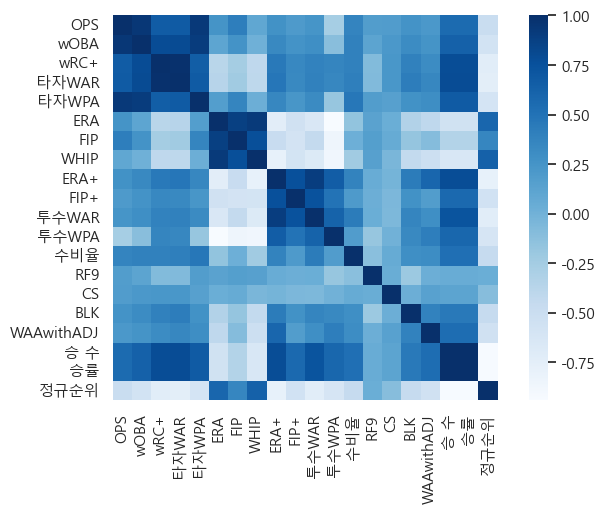

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
#상관관계 시각화
plt.figure(figsize = (8,5))
sns.heatmap(kbo_corr.corr(),
            annot = False,
            cmap = 'Blues',
            square = True,
            fmt = '.2f',
            annot_kws = {'size':8})
plt.show()#순위는 작을수록 좋으므로 음의 상관관계를 보이는 피쳐가 관련이 높음

In [206]:
target = '승률'
# 데이터 분리
x = kbo_re[kbo_re.columns.difference(['팀', '연도', '정규순위', '승 수', '승률'])]
y = kbo_re[target] 

In [207]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [209]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

# 선언하기
modelLR = LinearRegression()

# 학습하기
modelLR.fit(x_train, y_train)

# 예측하기
y_pred = modelLR.predict(x_test)

# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# 성능정보 수집
result = {}
result['Linear Regression'] = r2_score(y_test, y_pred)

0.008990877128010525
0.9609934397150346


In [212]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s =  scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [213]:
# 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *

# 선언하기
modelKNN = KNeighborsRegressor(n_neighbors=5)

# 학습하기
modelKNN.fit(x_train_s, y_train)

# 예측하기
y_pred = modelKNN.predict(x_test_s)

# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# 성능정보 수집
result['KNN'] = r2_score(y_test, y_pred)

0.030555555555555544
0.7901572493387834


In [214]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *

# 선언하기
modelDT = DecisionTreeRegressor(max_depth=5)

# 학습하기
modelDT.fit(x_train, y_train)

# 예측하기
y_pred = modelDT.predict(x_test)

# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# 성능정보 수집
result['Decision Tree'] = r2_score(y_test, y_pred)

0.04100597993827161
0.5905611124469023


In [215]:
# 불러오기
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

# 선언하기
modelRF = RandomForestRegressor()

# 학습하기
modelRF.fit(x_train, y_train)

# 예측하기
y_pred = modelRF.predict(x_test)

# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# 성능정보 수집
result['Random Forest'] = r2_score(y_test, y_pred)

0.026142939814814817
0.8401799374849727


In [217]:
# 불러오기
!pip install lightgbm
from lightgbm import LGBMRegressor
from sklearn.metrics import *

# 선언하기
modelLGB = LGBMRegressor()

# 학습하기
modelLGB.fit(x_train, y_train)

# 예측하기
y_pred = modelLGB.predict(x_test)

# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# 성능정보 수집
result['LighrGBM'] = r2_score(y_test, y_pred)

  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)
0.030653596752977474
0.7343002587572585


In [220]:
# xgboost 설치
!pip install xgboost
from xgboost import XGBRegressor

# 선언하기
modelXGB = XGBRegressor(max_depth = 5, random_state = 1)

# 학습하기
modelXGB.fit(x_train, y_train)

# 예측하기
y_pred = modelXGB.predict(x_test)

# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# 성능정보 수집
result['XGBoost'] = r2_score(y_test, y_pred)

  Using cached xgboost-1.7.4-py3-none-win_amd64.whl (89.1 MB)
0.031031676464610625
0.7886783132816078


In [221]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *

# 선언하기
estimators = [('lr', LinearRegression()),
              ('dt', DecisionTreeRegressor()),
              ('knn', make_pipeline(MinMaxScaler(), KNeighborsRegressor())),
              ('rdf', RandomForestRegressor()),
              ('lgb', LGBMRegressor()),
              ('xgb', XGBRegressor())]

model = VotingRegressor(estimators=estimators)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# 성능정보 수집
result['Voting'] = r2_score(y_test, y_pred)

0.02310698476317119
0.8691128526551788


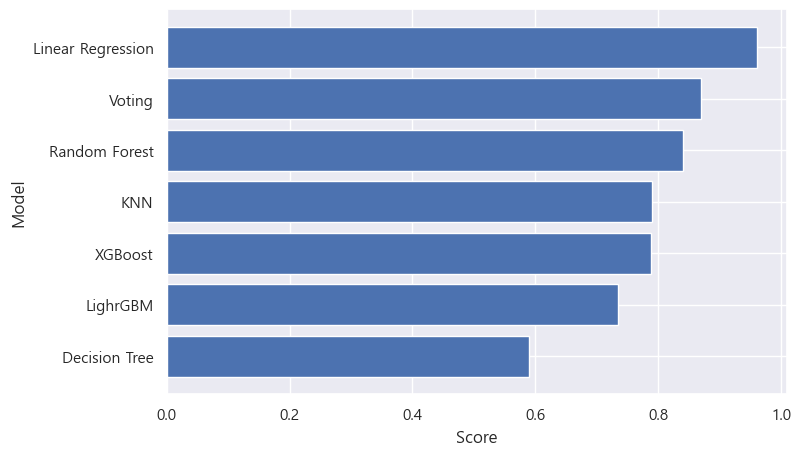

In [222]:
# 데이터프레임 만들기
df = pd.DataFrame.from_dict(result, orient='index', columns=['score'])
df.sort_values(by='score', ascending=True, inplace=True)

# 성능 비교
plt.figure(figsize=(8, 5))
plt.barh(y=df.index, width=df['score'])
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()


# 선형회귀가 가장 높은 r2score 기록 

## 이후 선형회귀로 분석

In [224]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     승률   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     155.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           8.07e-30
Time:                        20:34:48   Log-Likelihood:                 185.22
No. Observations:                  56   AIC:                            -334.4
Df Residuals:                      38   BIC:                            -298.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5196      0.882      0.589      0.559      -1.267       2.306
BLK        -9.937e-05      0.001     -0.084      0.933      -0.002       0.002
CS             0.0001      0.001      0.184      0.855      -0.001       0.002
ERA            0.0077      0.026      0.293      0.771      -0.046       0.061
ERA+        2.778e-05      0.001      0.020      0.984      -0.003       0.003
FIP           -0.0326      0.030     -1.091      0.282      -0.093       0.028
FIP+          -0.0010      0.001     -0.708      0.483      -0.004       0.002
OPS            0.5787      0.181      3.200      0.003       0.213       0.945
RF9            0.0238      0.028      0.845      0.403      -0.033       0.081
WAAwithADJ     0.0014      0.002      0.794      0.432      -0.002       0.005
WHIP           0.0336      0.073      0.461      0.647      -0.114       0.181
wOBA          -1.0029      0.510     -1.965      0.057      -2.036       0.030
wRC+          -0.0019      0.002     -1.052      0.299      -0.006       0.002
수비율            0.0817      0.832      0.098      0.922      -1.602       1.765
타자WAR          0.0019      0.002      0.851      0.400      -0.003       0.006
타자WPA          0.0066      0.001     10.042      0.000       0.005       0.008
투수WAR          0.0005      0.001      0.374      0.711      -0.002       0.003
투수WPA          0.0067      0.001      8.375      0.000       0.005       0.008
==============================================================================
Omnibus:                       17.890   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.243
Skew:                          -1.169   Prob(JB):                     5.44e-06
Kurtosis:                       5.219   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [227]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["FACTOR"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["FEATURES"] = X.columns
vif.round(1)

,FACTOR,FEATURES
0,1.8,BLK
1,1.3,CS
2,6609.7,ERA
3,9571.6,ERA+
4,8505.8,FIP
5,8261.5,FIP+
6,9381.9,OPS
7,6446.1,RF9
8,5.7,WAAwithADJ
9,3077.8,WHIP


In [241]:
kbo_re2 = kbo_re[kbo_re.columns.difference([ 'ERA', 'FIP', '수비율', 'wOBA', 'wRC+', 'RF9','ERA+','OPS','FIP+','WHIP'])]

In [242]:
target = '승률'
# 데이터 분리
x = kbo_re2[kbo_re2.columns.difference(['팀', '연도', '정규순위', '승 수', '승률'])]
y = kbo_re2[target] 

In [243]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()
#의미있는 지표 WPA

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     승률   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     408.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           4.03e-43
Time:                        20:47:56   Log-Likelihood:                 193.69
No. Observations:                  60   AIC:                            -371.4
Df Residuals:                      52   BIC:                            -354.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4870      0.016     29.890      0.000       0.454       0.520
BLK            0.0002      0.001      0.187      0.852      -0.002       0.002
CS             0.0004      0.001      0.651      0.518      -0.001       0.002
WAAwithADJ     0.0002      0.001      0.224      0.823      -0.002       0.002
타자WAR         -0.0005      0.000     -1.190      0.239      -0.001       0.000
타자WPA          0.0073      0.000     15.691      0.000       0.006       0.008
투수WAR          0.0006      0.001      1.124      0.266      -0.000       0.002
투수WPA          0.0066      0.000     15.875      0.000       0.006       0.007
==============================================================================
Omnibus:                       20.894   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.516
Skew:                          -1.312   Prob(JB):                     3.90e-07
Kurtosis:                       5.218   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["FACTOR"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["FEATURES"] = x.columns
vif.round(1)
#다중공선성 문제 없음

,FACTOR,FEATURES
0,1.3,BLK
1,1.1,CS
2,1.5,WAAwithADJ
3,13.9,타자WAR
4,3.0,타자WPA
5,10.9,투수WAR
6,2.1,투수WPA


## 스탯티즈 기준 승률에 의미있는 영향을 끼치는 지표는 WPA로 나타났다.


### 승률이랑 직접적으로 관련있는지표라 당연할수도

### WPA 한계가 명확한 지표(메이저에서 다루지 않음)
#### WAR과 OPS를 이용해 보정된 지표를 만들고 싶음(최근에는 출루율에 가중치 1.8를 곱하는 GPA(총생산평균, Gross #### Production Average)를 많이 사용하는 추세다.)
#### OPS,WHIP,ERA는 메이저 현역 선수들이 중요하다 생각하는 지표
#### RC,XR 고려해볼것

In [245]:
#WAR + WPA + OPS
LG["타자PAR"] = 
DS["타자PAR"] = 
KW["타자PAR"] = 
SSG["타자PAR"] = 
HH["타자PAR"] = 
LT["타자PAR"] = 
SS["타자PAR"] = 
KT["타자PAR"] = 
KIA["타자PAR"] = 
NC["타자PAR"] = 

LG["투수PAR"] = 
DS["투수PAR"] = 
KW["투수PAR"] = 
SSG["투수PAR"] = 
HH["투수PAR"] = 
LT["투수PAR"] = 
SS["투수PAR"] = 
KT["투수PAR"] = 
KIA["투수PAR"] = 
NC["투수PAR"] =

0.009470565113172071
0.9638986458545156


In [ ]:
#WHIP + ERA 